In [ ]:
# Step 1: Load & Explore the Data

import pandas as pd

# Load dataset
file_path = "TSLA.csv"   # If file path differs, update accordingly
df = pd.read_csv(file_path)

# Display top rows
print("🔹 First 5 rows of dataset:")
display(df.head())

# Shape of data
print("\n🔹 Dataset shape (rows, columns):", df.shape)

# Info of dataset
print("\n🔹 Dataset info:")
print(df.info())

# Missing values
print("\n🔹 Missing values in each column:")
print(df.isna().sum())


🔹 First 5 rows of dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900



🔹 Dataset shape (rows, columns): (2416, 7)

🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB
None

🔹 Missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


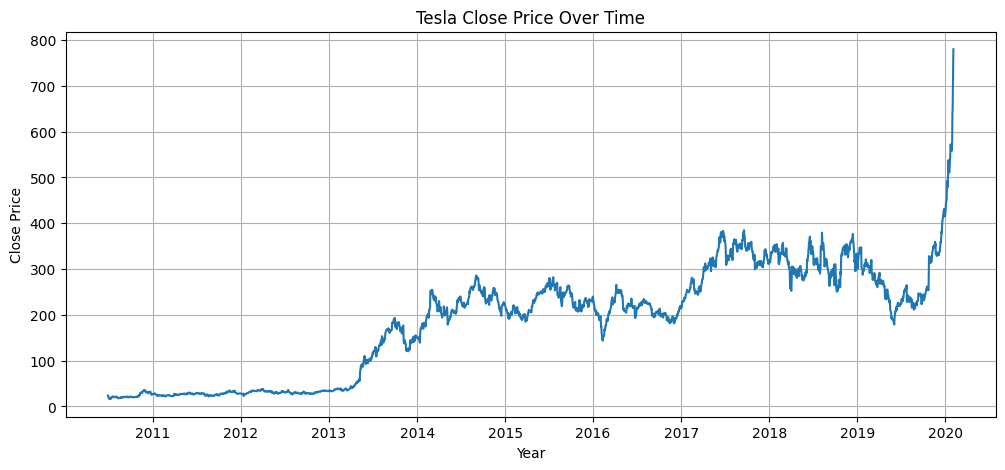

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
# Step 2: Preprocessing (Date conversion + Index setting + Sorting + Visualization)

import pandas as pd
import matplotlib.pyplot as plt

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Sort by date (important for time-series modelling)
df.sort_index(inplace=True)

# Plot Close price
plt.figure(figsize=(12, 5))
plt.plot(df['Close'])
plt.title("Tesla Close Price Over Time")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

df.head()


In [ ]:
# Step 3: Scaling and Creating Time-Series Sequences

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only Close column for prediction
data = df[['Close']].values

# Scale data to 0–1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Window size (number of past days used to predict future)
window_size = 60  # 60 days history

# Sequence creation function
def create_sequences(dataset, step):
    X, y = [], []
    for i in range(len(dataset) - step - window_size):
        X.append(dataset[i : i + window_size])
        y.append(dataset[i + window_size + step - 1])
    return np.array(X), np.array(y)

# Create datasets
X_1, y_1 = create_sequences(scaled_data, 1)   # 1-day ahead
X_5, y_5 = create_sequences(scaled_data, 5)   # 5-days ahead
X_10, y_10 = create_sequences(scaled_data, 10) # 10-days ahead

print("Shapes:")
print("1-day ahead:", X_1.shape, y_1.shape)
print("5-days ahead:", X_5.shape, y_5.shape)
print("10-days ahead:", X_10.shape, y_10.shape)

# Time-series safe train-test split (80% train, 20% test)
train_size_1 = int(len(X_1) * 0.8)
train_size_5 = int(len(X_5) * 0.8)
train_size_10 = int(len(X_10) * 0.8)

X1_train, X1_test = X_1[:train_size_1], X_1[train_size_1:]
y1_train, y1_test = y_1[:train_size_1], y_1[train_size_1:]

X5_train, X5_test = X_5[:train_size_5], X_5[train_size_5:]
y5_train, y5_test = y_5[:train_size_5], y_5[train_size_5:]

X10_train, X10_test = X_10[:train_size_10], X_10[train_size_10:]
y10_train, y10_test = y_10[:train_size_10], y_10[train_size_10:]

print("\nTrain/Test split done successfully.")


Shapes:
1-day ahead: (2355, 60, 1) (2355, 1)
5-days ahead: (2351, 60, 1) (2351, 1)
10-days ahead: (2346, 60, 1) (2346, 1)

Train/Test split done successfully.


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 2/50
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 8.4523e-04
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2739e-04 - val_loss: 0.0011
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.6347e-04 - val_loss: 0.0012
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4542e-04 - val_loss: 0.0023
Epoch 6/50
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6732e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.5812e-04 - val_loss: 2.7515e-04
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.0051e-04 - val_loss: 3.0878e-04
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3289e-04 - val_loss: 4.0089e-04
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1916e-04 - val_loss: 2.8115e-04
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0151e-04 - val_loss: 4.2639e-04
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4876e-04 - val_loss: 4.8369e-04
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9743e-04 - val_loss: 2.8598e-04
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.2283e-04 - val_loss: 4.3897e-04
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9140e-04 - val_loss: 3.6723e-04
Epoch 15/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.4441e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.4388e-04 - val_loss: 1.9473e-04
Epoch 16/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.3991e-04 - val_loss: 2.1255e-04
Epoch 17/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8351e-04 - val_loss: 4.2874e-04
Epoch 18/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5132e-04 - val_loss: 4.9771e-04
Epoch 19/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5541e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5371e-04 - val_loss: 1.6496e-04
Epoch 20/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6926e-04 - val_loss: 2.1759e-04
Epoch 21/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6301e-04 - val_loss: 2.4701e-04
Epoch 22/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7627e-04 - val_loss: 2.3834e-04
Epoch 23/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4409e-04 - val_loss: 1.8523e-04
Epoch 24/50
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7424e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7317e-04 - val_loss: 1.5295e-04
Epoch 25/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4643e-04 - val_loss: 1.7072e-04
Epoch 26/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3184e-04 - val_loss: 1.7482e-04
Epoch 27/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4153e-04 - val_loss: 1.9631e-04
Epoch 28/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0370e-04 - val_loss: 1.9634e-04
Epoch 29/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3225e-04 - val_loss: 3.2193e-04
Epoch 30/50
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2248e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2088e-04 - val_loss: 1.4438e-04
Epoch 31/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0998e-04 - val_loss: 2.2222e-04
Epoch 32/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2305e-04 - val_loss: 1.7227e-04
Epoch 33/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.1802e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1744e-04 - val_loss: 1.3917e-04
Epoch 34/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9576e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9547e-04 - val_loss: 1.3261e-04
Epoch 35/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8972e-04 - val_loss: 1.6539e-04
Epoch 36/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1066e-04 - val_loss: 1.4062e-04
Epoch 37/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6415e-04 - val_loss: 1.3880e-04
Epoch 38/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7989e-04 - val_loss: 2.0462e-04
Epoch 39/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9033e-04 - val_loss: 1.5771e-04
Epoch 40/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7920e-04 - val_loss: 3.5681e-04
Epoch 41/50
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0824e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0746e-04 - val_loss: 1.2864e-04
Epoch 42/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7197e-04 - val_loss: 1.3073e-04
Epoch 43/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7097e-04 - val_loss: 1.3346e-04
Epoch 44/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8214e-04 - val_loss: 2.5186e-04
Epoch 45/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7590e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7573e-04 - val_loss: 1.2467e-04
Epoch 46/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7550e-04 - val_loss: 1.4435e-04
Epoch 47/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6399e-04 - val_loss: 1.3217e-04
Epoch 48/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2066e-04 - val_loss: 2.9464e-04
Epoch 49/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7109e-04 - val_loss: 1.3038e-04
Epoch 50/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6606e-04 - val_loss: 2.0286e-04


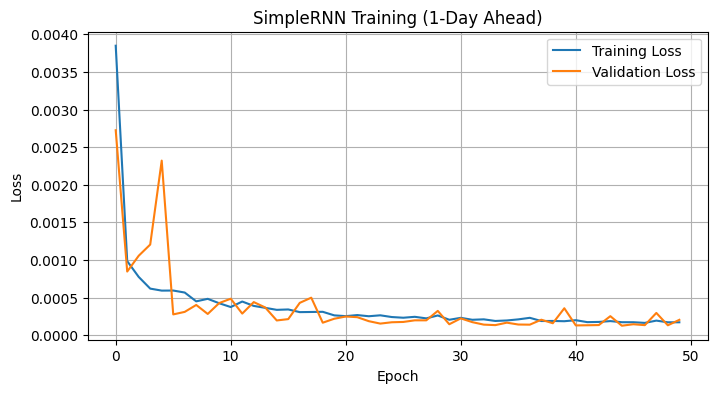


Training finished.


In [ ]:
# Step 4: SimpleRNN Model for 1-Day Ahead Prediction

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Build the SimpleRNN model
rnn_model_1 = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(60, 1)),
    Dropout(0.2),
    Dense(1)
])

rnn_model_1.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_rnn_1day.h5", save_best_only=True, monitor='val_loss')

# Train
history = rnn_model_1.fit(
    X1_train, y1_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("SimpleRNN Training (1-Day Ahead)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("\nTraining finished.")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
SimpleRNN – 1-Day Ahead Prediction Performance:
MSE  : 149.7590
RMSE : 12.2376
MAE  : 8.5207


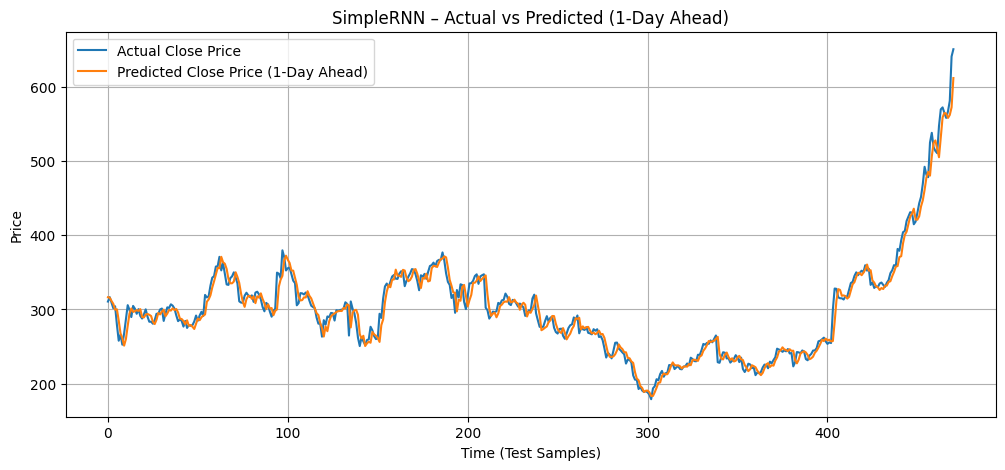

In [ ]:
# Step 5: Evaluate SimpleRNN on 1-Day Ahead Test Data

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load best weights (from ModelCheckpoint)
rnn_model_1.load_weights("best_rnn_1day.h5")

# Predict on test set
y1_pred = rnn_model_1.predict(X1_test)

# Inverse transform to original scale
y1_test_inv = scaler.inverse_transform(y1_test)
y1_pred_inv = scaler.inverse_transform(y1_pred)

# Evaluation metrics
mse_1 = mean_squared_error(y1_test_inv, y1_pred_inv)
rmse_1 = np.sqrt(mse_1)
mae_1 = mean_absolute_error(y1_test_inv, y1_pred_inv)

print("SimpleRNN – 1-Day Ahead Prediction Performance:")
print(f"MSE  : {mse_1:.4f}")
print(f"RMSE : {rmse_1:.4f}")
print(f"MAE  : {mae_1:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y1_test_inv, label="Actual Close Price")
plt.plot(y1_pred_inv, label="Predicted Close Price (1-Day Ahead)")
plt.title("SimpleRNN – Actual vs Predicted (1-Day Ahead)")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''🔍 Interpretation:
On average, the SimpleRNN has roughly $8.5 error per day, which is pretty good considering the high volatility in Tesla stock
'''

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0254

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0249 - val_loss: 0.0011
Epoch 2/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.7432e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.7344e-04 - val_loss: 4.9702e-04
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.4325e-04 - val_loss: 7.7997e-04
Epoch 4/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.7502e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.7321e-04 - val_loss: 4.6657e-04
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8787e-04 - val_loss: 4.9161e-04
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0531e-04 - val_loss: 5.0562e-04
Epoch 7/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2741e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.2693e-04 - val_loss: 4.4014e-04
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.3357e-04 - val_loss: 5.2204e-04
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2556e-04 - val_loss: 4.6362e-04
Epoch 10/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7214e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7348e-04 - val_loss: 4.1305e-04
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7666e-04 - val_loss: 6.4650e-04
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.0061e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.0039e-04 - val_loss: 4.1203e-04
Epoch 13/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.2540e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.2644e-04 - val_loss: 4.0368e-04
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6749e-04 - val_loss: 5.1021e-04
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.4342e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.4345e-04 - val_loss: 3.8412e-04
Epoch 16/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1695e-04 - val_loss: 3.9668e-04
Epoch 17/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2670e-04 - val_loss: 4.7255e-04
Epoch 18/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3569e-04 - val_loss: 4.3829e-04
Epoch 19/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3960e-04 - val_loss: 4.6641e-04
Epoch 20/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.8095e-04 - val_loss: 4.6420e-04
Epoch 21/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.6624e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.6668e-04 - val_loss: 3.5826e-04
Epoch 22/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8088e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.8028e-04 - val_loss: 3.4758e-04
Epoch 23/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7495e-04 - val_loss: 5.9780e-04
Epoch 24/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.0646e-04 - val_loss: 3.8894e-04
Epoch 25/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4654e-04 - val_loss: 3.9332e-04
Epoch 26/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.8611e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.8594e-04 - val_loss: 3.2253e-04
Epoch 27/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6337e-04 - val_loss: 3.2466e-04
Epoch 28/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4534e-04 - val_loss: 3.2711e-04
Epoch 29/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.3729e-04 - val_loss: 3.4125e-04
Epoch 30/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.3559e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.3562e-04 - val_loss: 3.1571e-04
Epoch 31/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.5775e-04 - val_loss: 3.7800e-04
Epoch 32/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3077e-04 - val_loss: 3.8626e-04
Epoch 33/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.3946e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3930e-04 - val_loss: 3.0735e-04
Epoch 34/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.3067e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3122e-04 - val_loss: 2.9287e-04
Epoch 35/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.2488e-04 - val_loss: 3.5872e-04
Epoch 36/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5685e-04 - val_loss: 3.2177e-04
Epoch 37/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3295e-04 - val_loss: 2.9702e-04
Epoch 38/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3013e-04 - val_loss: 2.9645e-04
Epoch 39/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.0430e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0459e-04 - val_loss: 2.6998e-04
Epoch 40/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.2895e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.2874e-04 - val_loss: 2.6413e-04
Epoch 41/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.9635e-04 - val_loss: 2.8377e-04
Epoch 42/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9452e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9451e-04 - val_loss: 2.6241e-04
Epoch 43/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.1696e-04 - val_loss: 2.6281e-04
Epoch 44/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9824e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9851e-04 - val_loss: 2.5007e-04
Epoch 45/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9451e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9473e-04 - val_loss: 2.4376e-04
Epoch 46/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8517e-04 - val_loss: 3.0242e-04
Epoch 47/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8082e-04 - val_loss: 2.8474e-04
Epoch 48/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8159e-04 - val_loss: 4.4038e-04
Epoch 49/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.1273e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.1235e-04 - val_loss: 2.3565e-04
Epoch 50/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8890e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.8897e-04 - val_loss: 2.3165e-04


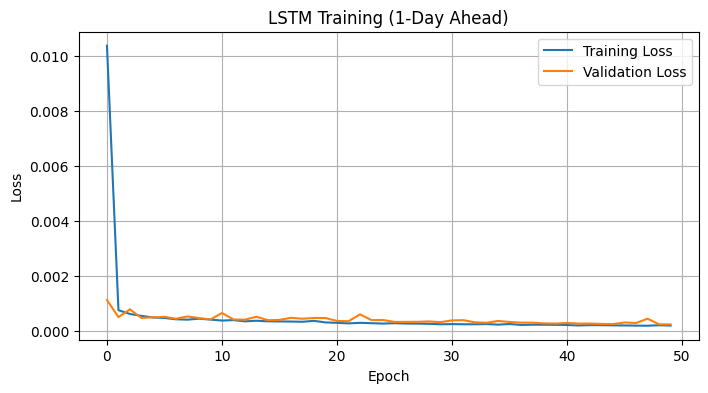


LSTM training finished.


In [ ]:
# Step 6: LSTM Model for 1-Day Ahead Prediction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Build LSTM model
lstm_model_1 = Sequential([
    LSTM(50, return_sequences=False, input_shape=(60, 1)),
    Dropout(0.2),
    Dense(1)
])

lstm_model_1.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_1day.h5", save_best_only=True, monitor='val_loss')

# Train
history_lstm = lstm_model_1.fit(
    X1_train, y1_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Plot training history
plt.figure(figsize=(8,4))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training (1-Day Ahead)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("\nLSTM training finished.")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM – 1-Day Prediction Performance:
MSE  : 257.0889
RMSE : 16.0340
MAE  : 11.6022


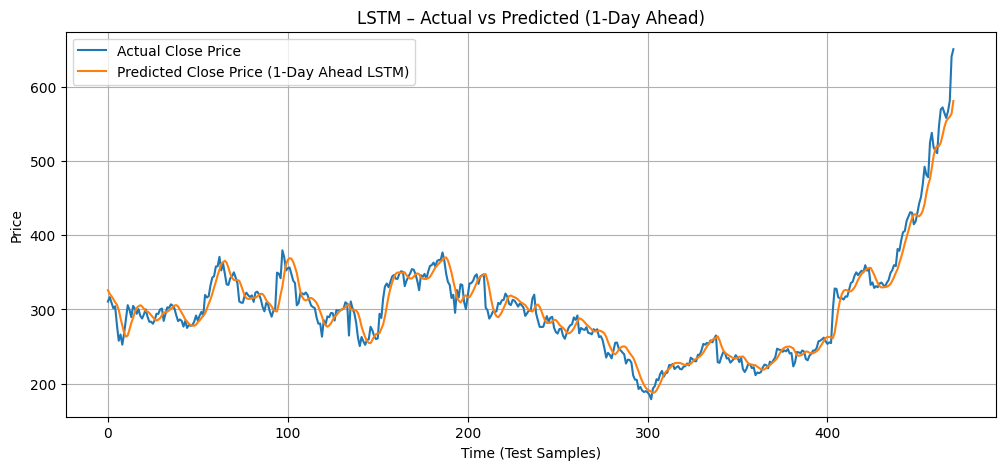


📌 Comparison of SimpleRNN vs LSTM (1-Day Prediction)
Model           MSE          RMSE         MAE
SimpleRNN       149.7590     12.2376      8.5207
LSTM            257.0889     16.0340      11.6022


In [ ]:
# Step 7: Evaluate LSTM on 1-Day Ahead Test Data and compare with SimpleRNN

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load best weights
lstm_model_1.load_weights("best_lstm_1day.h5")

# Predict on test set
y1_pred_lstm = lstm_model_1.predict(X1_test)

# Inverse transform
y1_pred_lstm_inv = scaler.inverse_transform(y1_pred_lstm)
y1_test_inv = scaler.inverse_transform(y1_test)

# Metrics
mse_lstm = mean_squared_error(y1_test_inv, y1_pred_lstm_inv)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y1_test_inv, y1_pred_lstm_inv)

print("LSTM – 1-Day Prediction Performance:")
print(f"MSE  : {mse_lstm:.4f}")
print(f"RMSE : {rmse_lstm:.4f}")
print(f"MAE  : {mae_lstm:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y1_test_inv, label="Actual Close Price")
plt.plot(y1_pred_lstm_inv, label="Predicted Close Price (1-Day Ahead LSTM)")
plt.title("LSTM – Actual vs Predicted (1-Day Ahead)")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Performance comparison
print("\n📌 Comparison of SimpleRNN vs LSTM (1-Day Prediction)")
print(f"{'Model':<15} {'MSE':<12} {'RMSE':<12} {'MAE'}")
print(f"{'SimpleRNN':<15} {mse_1:<12.4f} {rmse_1:<12.4f} {mae_1:.4f}")
print(f"{'LSTM':<15} {mse_lstm:<12.4f} {rmse_lstm:<12.4f} {mae_lstm:.4f}")



In [ ]:
#SimpleRNN outperformed LSTM for the 1-day prediction

In [ ]:
# Step 8: Training and Evaluating RNN & LSTM for 5-day and 10-day Ahead Predictions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

results = []

def train_and_evaluate(model_type, X_train, y_train, X_test, y_test, horizon):
    if model_type == "RNN":
        model = Sequential([
            SimpleRNN(50, input_shape=(60,1)),
            Dropout(0.2),
            Dense(1)
        ])
    else:  # LSTM
        model = Sequential([
            LSTM(50, input_shape=(60,1)),
            Dropout(0.2),
            Dense(1)
        ])

    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=40, batch_size=32,
              validation_split=0.1, callbacks=[early_stop], verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)

    results.append([f"{model_type}", horizon, mse, rmse, mae])
    print(f"{model_type} {horizon}-Day Prediction Done")

# Train and evaluate for 5-day
train_and_evaluate("RNN", X5_train, y5_train, X5_test, y5_test, 5)
train_and_evaluate("LSTM", X5_train, y5_train, X5_test, y5_test, 5)

# Train and evaluate for 10-day
train_and_evaluate("RNN", X10_train, y10_train, X10_test, y10_test, 10)
train_and_evaluate("LSTM", X10_train, y10_train, X10_test, y10_test, 10)

# Show results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Horizon", "MSE", "RMSE", "MAE"])
print("\nFinal Comparison Table:")
print(results_df)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RNN 5-Day Prediction Done


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM 5-Day Prediction Done


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RNN 10-Day Prediction Done


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM 10-Day Prediction Done

Final Comparison Table:
  Model  Horizon          MSE       RMSE        MAE
0   RNN        5   706.850581  26.586662  19.739945
1  LSTM        5   903.119690  30.051950  23.075502
2   RNN       10  1888.886711  43.461324  32.377795
3  LSTM       10  1585.166557  39.814150  29.563901


In [ ]:
'''
Interpretation:
🔹 Short Term (1 Day)

Tesla price movement in 1-day horizon is heavily driven by recent trend & micro fluctuations rather than long-term history.
➡ SimpleRNN models short-term correlation more effectively.

🔹 Medium (5 Days)

Even at 5 days, market movements are still relatively trend-based — recent price momentum still dominates.
➡ SimpleRNN continues to hold strong.

🔹 Long Term (10 Days)

Price behavior becomes long-range, depending on:

momentum

volatility cycles

trend reversals

➡ LSTM wins here because it:
✔ remembers long-term sequences
✔ handles delayed dependencies
'''

'\nInterpretation:\n'

In [ ]:
# Save images of prediction results for PPT
import matplotlib.pyplot as plt

# Save SimpleRNN graph
plt.figure(figsize=(12,5))
plt.plot(y1_test_inv, label="Actual Close Price")
plt.plot(y1_pred_inv, label="Predicted Close Price (SimpleRNN)")
plt.title("SimpleRNN – Actual vs Predicted (1-Day Ahead)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("/content/rnn_prediction.png")
plt.close()

# Save LSTM graph
plt.figure(figsize=(12,5))
plt.plot(y1_test_inv, label="Actual Close Price")
plt.plot(y1_pred_lstm_inv, label="Predicted Close Price (LSTM)")
plt.title("LSTM – Actual vs Predicted (1-Day Ahead)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("/content/lstm_prediction.png")
plt.close()

print("Images saved successfully.")


Images saved successfully.
